In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple
from datetime import datetime

In [3]:
specimen = pd.read_csv("specimenDate_ageDemographic-unstacked.xls - specimenDate_ageDemographic-unstacked.csv")

In [4]:
new_data = specimen[['areaType', 'areaCode', 'areaName', 'date', 'newCasesBySpecimenDate-0_4', 'newCasesBySpecimenDate-0_59',
       'newCasesBySpecimenDate-10_14', 'newCasesBySpecimenDate-15_19',
       'newCasesBySpecimenDate-20_24', 'newCasesBySpecimenDate-25_29',
       'newCasesBySpecimenDate-30_34', 'newCasesBySpecimenDate-35_39',
       'newCasesBySpecimenDate-40_44', 'newCasesBySpecimenDate-45_49',
       'newCasesBySpecimenDate-50_54', 'newCasesBySpecimenDate-55_59',
       'newCasesBySpecimenDate-5_9', 'newCasesBySpecimenDate-60+',
       'newCasesBySpecimenDate-60_64', 'newCasesBySpecimenDate-65_69',
       'newCasesBySpecimenDate-70_74', 'newCasesBySpecimenDate-75_79',
       'newCasesBySpecimenDate-80_84', 'newCasesBySpecimenDate-85_89',
       'newCasesBySpecimenDate-90+', 'newCasesBySpecimenDate-unassigned',]]

In [5]:
temp = new_data[new_data["date"].between("2020-03-16", "2020-04-01")]

In [6]:
temp.head()

,areaType,areaCode,areaName,date,newCasesBySpecimenDate-0_4,newCasesBySpecimenDate-0_59,newCasesBySpecimenDate-10_14,newCasesBySpecimenDate-15_19,newCasesBySpecimenDate-20_24,newCasesBySpecimenDate-25_29,...,newCasesBySpecimenDate-5_9,newCasesBySpecimenDate-60+,newCasesBySpecimenDate-60_64,newCasesBySpecimenDate-65_69,newCasesBySpecimenDate-70_74,newCasesBySpecimenDate-75_79,newCasesBySpecimenDate-80_84,newCasesBySpecimenDate-85_89,newCasesBySpecimenDate-90+,newCasesBySpecimenDate-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [7]:
def plot_cases_per_day(data, col: str, start: str, end: str) -> Tuple[List[int], List[str]]:
    """plots total number of reported cases daily"""
    res = []
    temp = data[data[col].between(start, end)]
    uniques = temp[col].unique()
    for i in uniques:
        t = temp[temp[col] == i]
        s = t.drop(["areaType", "areaCode", "areaName", "date"], axis=1).sum().sum()
        res.append(s)
    return res, uniques

In [8]:
def plot_cases_per_week(data, col: str, start: str, end: str) -> Tuple[List[int], List[str]]:
    """plots total number of reported cases daily"""
    res = []
    weeks = []
    temp = data[data[col].between(start, end)]
    uniques = temp[col].unique()
    st = 0
    en = 7
    c = 1
    while en <= len(uniques):
        ran = uniques[st:en]
        st = en
        en += 7
        nxt = temp["date"].unique()[st:en]
        for i in ran:
            t = temp[temp[col] == i]
            s = t.drop(["areaType", "areaCode", "areaName", "date"], axis=1).sum().sum()
        res.append(s)
        weeks.append(f"week {c}")
        if len(nxt) < 7:
            for i in nxt:
                t = temp[temp[col] == i]
                s = t.drop(["areaType", "areaCode", "areaName", "date"], axis=1).sum().sum()
            res.append(s)
            weeks.append(f"week {c + 1}")
            break
        else:
            pass
        c += 1
    return res, weeks

In [9]:
def plot_monthly_cases(data: pd.DataFrame, col: str) -> Tuple[List[int], List[str]]:
    """plots the total number of reported cases per month"""
    ms = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }
    new_date = pd.to_datetime(data[col])
    months = []
    res = []
    month_names = []
    for d in new_date:
        months.append(d.month)
    u_m = sorted(list(set(months)))
    for i in u_m:
        su = 0
        for k, d in data.iterrows():
            if str(i) in d.values[3].split("-")[1]:
                su += d.drop(["areaType", "areaCode", "areaName", "date"]).sum()
            else:
                pass
        res.append(su)
        month_names.append(ms.get(i))
    return res, month_names
            
    

In [10]:
def plot_cases_per_area_day(data: pd.DataFrame, col: str, dat: str) -> Tuple[List[str], List[int]]:
    target = data[data[col] == dat].drop(["areaType", "areaCode", "date"], axis=1)
    unique_areas = target["areaName"].unique()
    areas = []
    vals = []
    res = []
    res_n = []
    for a in unique_areas:
        t = target[target["areaName"] == a].drop(["areaName"], axis=1).sum().sum()
        vals.append(t)
        areas.append(a)
    new_vals = sorted(vals, reverse=True)
    for i, k in enumerate(new_vals[:6]):
        res.append(k)
        res_n.append(areas[vals.index(k)])
    return res_n, res

In [11]:
def plot_cases_per_area_week(data: pd.DataFrame, col: str, start: str, end: str) -> Tuple[List[str], List[int]]:
    """plots the areas with the highest positive change in cases over a seven day period"""
    if diff := (datetime.strptime(end, "%Y-%m-%d") - datetime.strptime(start, "%Y-%m-%d")).days < 7:
        raise ValueError("Difference in dates not up to seven days")

    first = data[data[col] == start].drop(["areaType", "areaCode", "date"], axis=1)
    second = data[data[col] == end].drop(["areaType", "areaCode", "date"], axis=1)
    res = []
    diff = []
    are = []
    new_areas = []
    areas = data["areaName"].unique()
    for area in areas:
        ft = first[first["areaName"] == area].drop(["areaName"], axis=1).sum().sum()
        sd = second[second["areaName"] == area].drop(["areaName"], axis=1).sum().sum()
        are.append(area)
        diff.append(sd - ft)
    
    new_diff = sorted(diff, reverse=True)
    for i, k in enumerate(new_diff[:6]):
        res.append(k)
        new_areas.append(are[diff.index(k)])
    return new_areas, res

    


In [12]:
def plot_areas_compare_day(data: pd.DataFrame, col1: str, col2: str, area1: str, area2: str, start: str, end: str) -> Tuple[List[str], List[int], List[int]]:
    """plots the daily change in cases for the two areas"""
    if area1 not in data["areaName"].unique() and area2 not in data["areaName"].unique():
        raise ValueError("The areas are not present in the dataset")

    first = data[data[col1].between(start, end)].drop(["areaType", "areaCode"], axis=1)
    second = data[data[col1].between(start, end)].drop(["areaType", "areaCode"], axis=1)

    ff = first[first[col2] == area1]
    ss = second[second[col2] == area2]

    s1 = []
    s2 = []
    day = []

    days = ff[col1].unique()
    for d in days:
        ft = ff[ff[col1] == d].drop(["areaName", "date"] , axis = 1).sum().sum()
        sc = ss[ss[col1] == d].drop(["areaName", "date"], axis = 1).sum().sum()
        s1.append(ft)
        s2.append(sc)
        day.append(d)
    return day, s1, s2

In [13]:
def plot_areas_compare_cumm_day(data: pd.DataFrame, col1: str, col2: str, area1: str, area2: str, start: str, end: str) -> Tuple[List[str], List[int], List[int]]:
    """plots the daily change in cases for the two areas"""
    if area1 not in data["areaName"].unique() and area2 not in data["areaName"].unique():
        raise ValueError("The areas are not present in the dataset")

    first = data[data[col1].between(start, end)].drop(["areaType", "areaCode"], axis=1)
    second = data[data[col1].between(start, end)].drop(["areaType", "areaCode"], axis=1)

    ff = first[first[col2] == area1]
    ss = second[second[col2] == area2]

    s1 = []
    s2 = []
    day = []

    days = ff[col1].unique()
    for d in days:
        ft = ff[ff[col1] == d].drop(["areaName", "date"] , axis = 1).sum().sum()
        sc = ss[ss[col1] == d].drop(["areaName", "date"], axis = 1).sum().sum()
        s1.append(ft)
        s2.append(sc)
        day.append(d)
    
    l = len(s1)
    cu1 = [sum(s1[0:x:1]) for x in range(0, l + 1)][1:]
    cu2 = [sum(s2[0:x:1]) for x in range(0, l + 1)][1:]
    return day, cu1, cu2

In [14]:
res = []
for item in temp["date"].unique():
    t = temp[temp["date"] == item]
    su = t.drop(["areaType", "areaCode", "areaName", "date"], axis=1).sum().sum()
    res.append(su)
    

In [15]:
res, temp["date"].unique()

([5388,
  6688,
  8958,
  9108,
  10548,
  10192,
  11940,
  19820,
  19972,
  22216,
  25588,
  25796,
  23456,
  24104,
  34586,
  36996,
  40226],
 array(['2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
        '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
        '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
        '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
        '2020-04-01'], dtype=object))

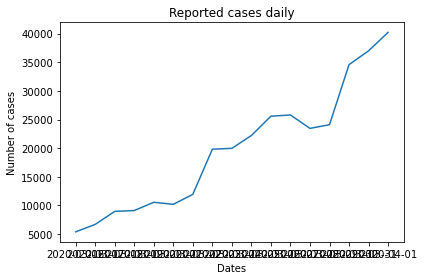

In [16]:
plt.plot(temp["date"].unique(), res)
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.title("Reported cases daily")
plt.tight_layout()

[11940, 24104, 40226]


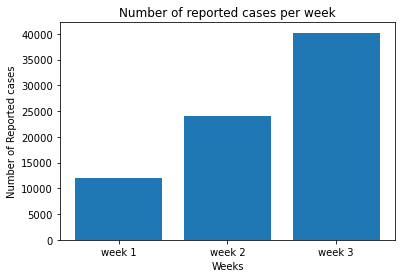

In [17]:
val, wks = plot_cases_per_week(new_data, "date", "2020-03-16", "2020-04-01")
plt.bar(wks, val)
plt.xlabel("Weeks")
plt.ylabel("Number of Reported cases")
plt.title("Number of reported cases per week")
print(val)

[4924692, 554, 321048, 1147652, 672492, 252384, 190962, 295326, 1264930, 4792684, 131994]


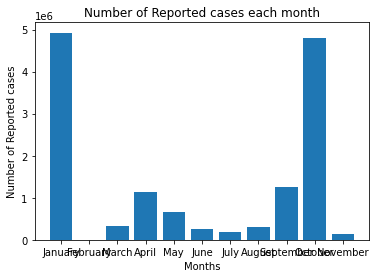

In [18]:
m_val, m_names = plot_monthly_cases(new_data, "date")
plt.bar(m_names, m_val)
plt.xlabel("Months")
plt.ylabel("Number of Reported cases")
plt.title("Number of Reported cases each month")
print(m_val)

[2166, 2166, 852, 302, 252, 208]


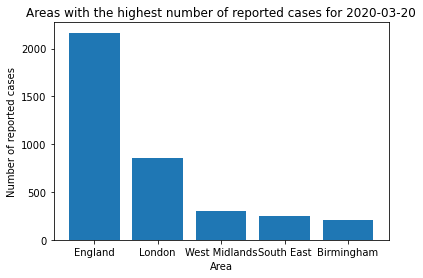

In [19]:
areas, cs = plot_cases_per_area_day(new_data, "date", "2020-03-20")

plt.bar(areas, cs)
plt.title("Areas with the highest number of reported cases for 2020-03-20")
plt.xlabel("Area")
plt.ylabel("Number of reported cases")
print(cs)

[3148, 3148, 790, 502, 412, 346]


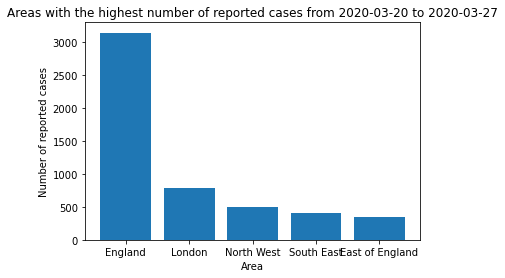

In [20]:
na, diff = plot_cases_per_area_week(new_data, "date", "2020-03-20", "2020-03-27")
plt.bar(na, diff)
plt.title("Areas with the highest number of reported cases from 2020-03-20 to 2020-03-27")
plt.xlabel("Area")
plt.ylabel("Number of reported cases")
print(diff)

a1 = [2166, 2072, 2418, 4030, 4052, 4526, 5228, 5314]
a2 = [852, 702, 874, 1378, 1274, 1518, 1532, 1642]


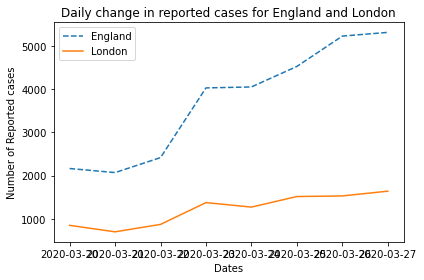

In [21]:
dt, a1, a2 = plot_areas_compare_day(new_data, "date", "areaName", "England", "London", "2020-03-20", "2020-03-27")
plt.plot(dt, a1, "--", label = "England")
plt.plot(dt, a2, label = "London")
plt.legend()
plt.title("Daily change in reported cases for England and London")
plt.xlabel("Dates")
plt.ylabel("Number of Reported cases")
plt.tight_layout()

print(f"a1 = {a1}")

print(f"a2 = {a2}")

a1 = [2166, 4238, 6656, 10686, 14738, 19264, 24492, 29806]
a2 = [852, 1554, 2428, 3806, 5080, 6598, 8130, 9772]


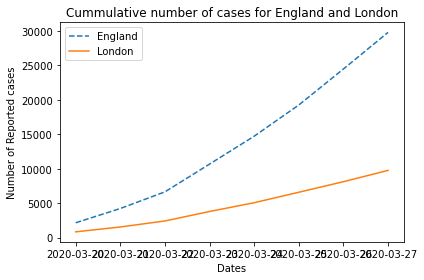

In [22]:
ds, aa1, aa2 = plot_areas_compare_cumm_day(new_data, "date", "areaName", "England", "London", "2020-03-20", "2020-03-27")
plt.plot(ds, aa1, "--", label = "England")
plt.plot(ds, aa2, label = "London")
plt.legend()
plt.title("Cummulative number of cases for England and London")
plt.xlabel("Dates")
plt.ylabel("Number of Reported cases")
plt.tight_layout()

print(f"a1 = {aa1}")

print(f"a2 = {aa2}")